# Singular Value Decomposition (SVD) in NumPy

In this notebook, we will explore the Singular Value Decomposition (SVD) of matrices using NumPy. We will cover the following topics:

1. What is SVD?
2. Unitarity of the U and V matrices
3. Full vs. Thin SVD
4. Recovering the original matrix
5. Low-Rank Approximations using SVD
6. Exercises


## 1. What is SVD?

Singular Value Decomposition (SVD) is a factorization of a matrix into three matrices:

$A = U \Sigma V^T$

Where:
- $A$ is the original matrix of shape $m \times n$
- $U$ is an $m \times m$ unitary matrix
- $\Sigma$ is an $m \times n$ diagonal matrix of singular values
- $V^T$ is the transpose of an $n \times n$ unitary matrix
- $m \ge n$

SVD can be used for various purposes, such as matrix approximation, dimensionality reduction, and solving linear equations.

In [1]:
# Import the necessary libraries
import numpy as np

m, n = 4, 3

# Create a random matrix A of shape 4x3
A = np.random.rand(m, n)
print("Matrix A:\n", A)

Matrix A:
 [[0.90762397 0.0120606  0.26483052]
 [0.11168751 0.34846687 0.03981812]
 [0.17328414 0.24099679 0.2910606 ]
 [0.99993695 0.64153166 0.88931737]]


## 2. Unitarity of the U and V Matrices

The matrices $U$ and $V$ from the SVD are **unitary** (or orthogonal in the case of real matrices). This means that:

$U^T U = I \quad \text{and} \quad V^T V = I$

Let's perform SVD on the matrix ( A ) and check the unitarity of ( U ) and ( V ).

In [2]:
# Perform SVD
U, S, Vt = np.linalg.svd(A)
print("U Matrix:\n", U)
print("Singular Values (S):\n", S)
print("V Transpose Matrix (V^T):\n", Vt)

U Matrix:
 [[-0.47705212  0.81058014  0.25540946 -0.22393554]
 [-0.13388001 -0.37765383  0.91544184 -0.03768247]
 [-0.21526391 -0.31381036 -0.19812226 -0.90328959]
 [-0.84152176 -0.31915589 -0.23974949  0.36400663]]
Singular Values (S):
 [1.75036207 0.54312458 0.21434611]
V Transpose Matrix (V^T):
 [[-0.75796157 -0.36800789 -0.53857632]
 [ 0.5891993  -0.74052929 -0.3232036 ]
 [ 0.27989007  0.56230469 -0.77812273]]


Note that the singular values are returned as a vector and not as a matrix.

Now let's check the unitarity of $U$ and $V^T$ by verifying the products above.

In [3]:
# Check unitarity of U (U^T U = I)
print("U^T U =\n", np.dot(U.T, U))

# Check unitarity of V (V^T V = I)
print("V^T V =\n", np.dot(Vt.T, Vt))

U^T U =
 [[ 1.00000000e+00 -2.03957894e-16  7.39271630e-17  2.32765140e-18]
 [-2.03957894e-16  1.00000000e+00  3.44636240e-16 -7.29069189e-17]
 [ 7.39271630e-17  3.44636240e-16  1.00000000e+00 -5.57432207e-18]
 [ 2.32765140e-18 -7.29069189e-17 -5.57432207e-18  1.00000000e+00]]
V^T V =
 [[ 1.00000000e+00 -1.02101861e-16  1.91858180e-16]
 [-1.02101861e-16  1.00000000e+00  3.86018586e-16]
 [ 1.91858180e-16  3.86018586e-16  1.00000000e+00]]


Both results should be close to the identity matrix, confirming the unitarity of $U$ and $V^T$.

## 3. Full vs. Thin SVD

### Full SVD
The full SVD returns the complete matrices $U$, $\Sigma$, and $V^T$, where $U$ is an $m \times m$ matrix, and $V^T$ is an $n \times n$ matrix.

### Thin SVD
In contrast, the thin SVD only returns the first $n$ columns of $U$. Discarding the other columns does affect accuracy of the decomposition since the those column would only be multiplied by the zero rows of the $\Sigma$ matrix.

Let's demonstrate the difference between full and thin SVD using NumPy's `full_matrices` parameter.

In [4]:
# Perform full SVD (full_matrices=True)
U_full, S_full, Vt_full = np.linalg.svd(A, full_matrices=True)

# Perform thin SVD (full_matrices=False)
U_thin, S_thin, Vt_thin = np.linalg.svd(A, full_matrices=False)

# Print the shapes of full and thin SVD components
print("Full SVD U shape:", U_full.shape)
print("Thin SVD U shape:", U_thin.shape)
print("Full SVD V^T shape:", Vt_full.shape)
print("Thin SVD V^T shape:", Vt_thin.shape)
print("Full SVD S shape:", S_full.shape)
print("Thin SVD S shape:", S_thin.shape)

Full SVD U shape: (4, 4)
Thin SVD U shape: (4, 3)
Full SVD V^T shape: (3, 3)
Thin SVD V^T shape: (3, 3)
Full SVD S shape: (3,)
Thin SVD S shape: (3,)


## 4. Recovering the Original Matrix

To recover the original matrix $A$ from its SVD components, we use the following formula:

$A = U \Sigma V^T$

Since the numpy SVD function returns the singular values in a vector, we need to contruct the matrix $\Sigma$. How we so depends on whether $U$ is a full matrix or not since the dimensions have to match.

In [10]:
# Reconstruct the matrix A from its full SVD
sigma_full = np.zeros([m,n])
sigma_full[:n,:n] = np.diagflat(S_full)
A_reconstructed_full = np.dot(U_full, np.dot(sigma_full, Vt_full))
print("Reconstructed A (Full SVD):\n", A_reconstructed_full)

# Reconstruct the matrix A from its thin SVD
sigma_thin = np.diag(S_thin)
A_reconstructed_thin = np.dot(U_thin, np.dot(sigma_thin, Vt_thin))
print("Reconstructed A (Thin SVD):\n", A_reconstructed_thin)

Reconstructed A (Full SVD):
 [[0.85413746 0.55021194 0.54059935]
 [0.38694056 0.88699641 0.67103112]
 [0.60538483 0.16528018 0.57124405]
 [0.93470429 0.91188379 0.73638775]]
Reconstructed A (Thin SVD):
 [[0.85413746 0.55021194 0.54059935]
 [0.38694056 0.88699641 0.67103112]
 [0.60538483 0.16528018 0.57124405]
 [0.93470429 0.91188379 0.73638775]]


Both the full and thin SVD reconstructions should closely match the original matrix.

## 5. Low-Rank Approximations using SVD

One of the most powerful applications of SVD is creating low-rank approximations of a matrix. By truncating the singular values in $\Sigma$, we can create a lower-rank approximation that still captures the essential features of the matrix, while reducing its size.

We can use the top $k$ singular values to create a rank-$k$ approximation of matrix $A$.

In [6]:
# Create a low-rank approximation of matrix A
# Select top k singular values (k=2)
k = 2

# Use the top k singular values to reconstruct A
U_k = U_thin[:, :k]
S_k = np.diag(S_thin[:k])
Vt_k = Vt_thin[:k, :]

A_approx = np.dot(U_k, np.dot(S_k, Vt_k))
print("Low-rank approximation (k=2):\n", A_approx)

Low-rank approximation (k=2):
 [[0.81480185 0.5179207  0.61935117]
 [0.42712758 0.91998659 0.59057473]
 [0.67623756 0.22344434 0.42939341]
 [0.89792211 0.8816887  0.81002748]]


### Plotting Approximation Error as a Function of Truncation
To understand how truncating the singular values affects the accuracy of the approximation, we can plot the approximation error as a function of the rank ( k ). The error can be computed as the Frobenius norm of the difference between the original matrix and the rank-( k ) approximation.

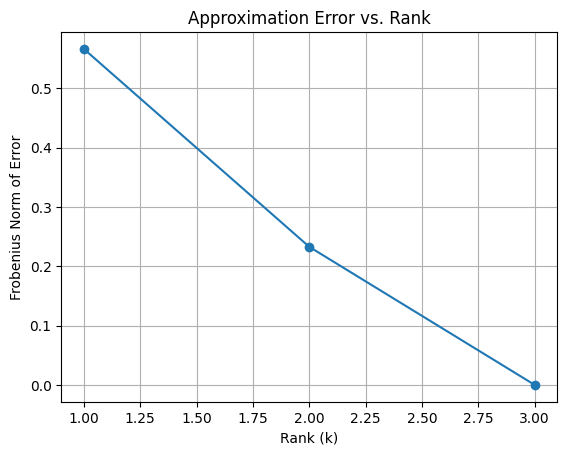

In [7]:
import matplotlib.pyplot as plt

# Compute approximation errors for different values of k
errors = []
ranks = np.arange(1, len(S_thin) + 1)

for k in ranks:
    U_k = U_thin[:, :k]
    S_k = np.diag(S_thin[:k])
    Vt_k = Vt_thin[:k, :]
    A_approx_k = np.dot(U_k, np.dot(S_k, Vt_k))
    error = np.linalg.norm(A - A_approx_k)
    errors.append(error)

# Plot the approximation error as a function of rank k
plt.plot(ranks, errors, marker='o')
plt.title('Approximation Error vs. Rank')
plt.xlabel('Rank (k)')
plt.ylabel('Frobenius Norm of Error')
plt.grid(True)
plt.show()

## Using SVD for Image Compression

A nice way to visual truncating the singular values is to apply the SVD to image compression. A grayscale image can be represented as a 2D matrix, where each element in the matrix corresponds to the intensity of a pixel (ranging from 0 to 255). We can obtain a low-rank approximation for this matrix which allows us to express it with fewer parameters with a minimal loss of information.

In [8]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float

# Function to compute SVD and compress the image
def compress_image_svd(image, num_sv):
    # Perform Singular Value Decomposition
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    
    # Only keep the top 'num_sv' singular values
    S_compressed = np.diag(S[:num_sv])
    U_compressed = U[:, :num_sv]
    Vt_compressed = Vt[:num_sv, :]
    
    # Reconstruct the compressed image
    compressed_image = np.dot(U_compressed, np.dot(S_compressed, Vt_compressed))
    
    return compressed_image

# Load the grayscale image
def load_grayscale_image(image_path):
    image = io.imread(image_path)
    if image.ndim == 3:  # If the image is colored, convert to grayscale
        # remove alpha and convert to float
        image = img_as_float(color.rgb2gray(color.rgba2rgb(image)))
    return image

# Plot the original and compressed images
def plot_images(original, compressed):
    plt.figure(figsize=(10, 5))
    
    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot compressed image
    plt.subplot(1, 2, 2)
    plt.imshow(compressed, cmap='gray')
    plt.title('Compressed Image')
    plt.axis('off')
    
    plt.show()


Image dimensions:  (128, 542)


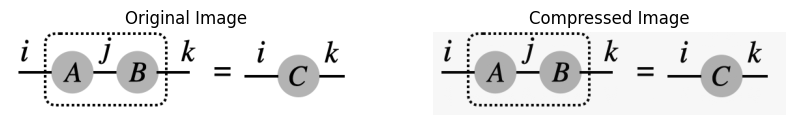

Compression Ratio: 0.97


In [9]:

# Load a sample grayscale image (provide path to your image file)
image_path = 'img/matmul.png'
image = load_grayscale_image(image_path)
print("Image dimensions: ", image.shape)

# Compress the image using SVD (experiment with different numbers of components)
num_sv = 100  # You can adjust this value
compressed_image = compress_image_svd(image, num_sv)

# Plot original and compressed images
plot_images(image, compressed_image)

# Calculate compression ratio
original_size = np.prod(image.shape)
compressed_size = num_sv * (image.shape[0] + image.shape[1])
compression_ratio = compressed_size / original_size

print(f"Compression Ratio: {compression_ratio:.2f}")

## 6. Exercises
Test your understanding of SVD by completing the following exercises:

1. **Unitary Matrices**: Create a random $5 \times 5$ matrix and perform SVD. Verify that the U and V matrices are unitary.
2. **Low-Rank Approximation**: For a $60 \times 40$ random matrix, create low-rank approximations with different values of $k$ and plot the approximation error as a function of $k$.
3. **Compression**: How can you use SVD to compress an image? Try compressing a *color* image and visualize the approximation for different ranks. Compute the compression ratio.
